In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV


In [5]:
training_data = pd.read_csv('data/train_base.csv')
test_data = pd.read_csv('data/test_base.csv')

In [6]:
training_data.head()

,ID,Cycle,S1,S2,S3,S4,TTF,TTF_LABEL
0,1,1,1400.60,554.36,47.47,521.66,191,0
1,1,2,1403.14,553.75,47.49,522.28,190,0
2,1,3,1404.20,554.26,47.27,522.42,189,0
3,1,4,1401.87,554.45,47.13,522.86,188,0
4,1,5,1406.22,554.00,47.28,522.19,187,0


In [7]:
test_data.head()

,ID,Cycle,S1,S2,S3,S4,TTF,TTF_LABEL
0,1,31,1398.91,554.42,47.23,521.79,112,0
1,2,49,1410.83,553.52,47.67,521.74,98,0
2,3,126,1418.89,552.59,47.88,520.83,69,0
3,4,106,1406.88,552.64,47.65,521.88,82,0
4,5,98,1419.36,553.29,47.46,521.00,91,0


In [8]:
# Define features and target
features = ['S1', 'S2', 'S3', 'S4']
target = 'TTF_LABEL'

In [9]:
training_data[features].head()

,S1,S2,S3,S4
0,1400.60,554.36,47.47,521.66
1,1403.14,553.75,47.49,522.28
2,1404.20,554.26,47.27,522.42
3,1401.87,554.45,47.13,522.86
4,1406.22,554.00,47.28,522.19


In [13]:
# Define classifier for logistic regression
logistic_regression_classifier = LogisticRegression(C=0.1)

In [14]:
# Fit the classifier and predict on test data
logistic_regression_classifier.fit(training_data[features], training_data[target])
test_predictions = logistic_regression_classifier.predict(test_data[features])

In [20]:
# Generate confusion matrix
logistic_confusion_matrix = confusion_matrix(test_data[target], test_predictions)

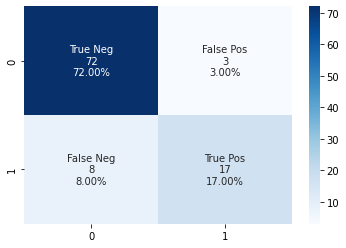

In [21]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                logistic_confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     logistic_confusion_matrix.flatten()/np.sum(logistic_confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns_plot = sns.heatmap(logistic_confusion_matrix, annot=labels, fmt='', cmap='Blues')

In [22]:
classification_report(test_data[target], test_predictions)

'              precision    recall  f1-score   support\n\n           0       0.90      0.96      0.93        75\n           1       0.85      0.68      0.76        25\n\n    accuracy                           0.89       100\n   macro avg       0.88      0.82      0.84       100\nweighted avg       0.89      0.89      0.89       100\n'